In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import glob

In [4]:
train_files=glob.glob("C:/Users/pal07/Desktop/flowers/**/*")

In [5]:
train_files

['C:/Users/pal07/Desktop/flowers\\astilbe\\10091895024_a2ea04cda6_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1033455028_f0c6518ec9_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\10373087134_927b53fb9f_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1052212431_4963309d03_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1052219251_d03970e956_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1052586928_366c5255b8_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1052587144_34c9f0714c_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1053073526_188a5b816e_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1053075100_838051e5b7_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1053079170_650c3c6af6_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1053080414_1edf92651d_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\1074784463_46a8df182c_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\11018294886_306c3ce9db_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\astilbe\\11141

In [6]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/pal07/Desktop/flowers\\astilbe\\50093372943_e09c4be4f7_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\tulip\\13982237316_f092f1213e_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\rose\\543488055_2e973307b7_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\daffodil\\2304871608_74a9d7b2a2_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\common_daisy\\35977709634_c6ffb3c370_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\coreopsis\\5501796880_e075a24ddc_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\california_poppy\\51020491643_accafb24a7_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\dandelion\\16618989168_57b4e30411_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\calendula\\31166719770_64cc87bd65_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\sunflower\\3674331390_acb434b133_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\iris\\4832406375_50af6f258e_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\coreopsis\\632496118_c01842052c_c.jpg',
 'C:/Users/pal07/Desktop/flowers\\carnation\\51695229026_f50b9fb55c_c.jpg',
 'C:/Users/pal07/Desktop/fl

In [7]:
train_files[0]

'C:/Users/pal07/Desktop/flowers\\astilbe\\50093372943_e09c4be4f7_c.jpg'

In [11]:
pip install opencv-python


In [12]:
from PIL import Image
import cv2

In [13]:
type = {'astilbe':0,'bellflower':1,'black_eyed_susan':2,'calendula':3,'california_poppy':4,'carnation':5,'common_daisy':6,'coreopsis':7,'daffodil':8,'dandelion':9,'iris':10,'magnolia':11,'rose':12,'sunflower':13,'tulip':14,'water_lily':15}

In [16]:
key1 = 's\\'
key2='\\'

In [17]:
identity=(train_files[0].partition(key1)[2]).partition(key2)[0]
identity

'astilbe'

In [18]:
len(train_files)

15740

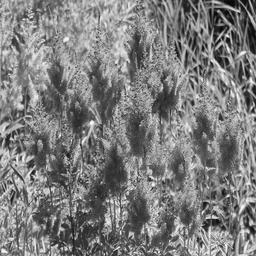

In [19]:
img= Image.open(train_files[0]).convert(mode='L')
img

In [22]:
arr=np.array(img)
arr

array([[115, 156, 163, ..., 100, 106,  29],
       [117, 162, 184, ...,  75,  85,  45],
       [117, 151, 190, ...,  57,  59,  53],
       ...,
       [112, 122, 139, ..., 149,  82,  88],
       [ 76, 133, 162, ..., 111, 102, 141],
       [120, 117, 124, ..., 109, 116, 131]], dtype=uint8)

In [72]:
X = np.zeros((len(train_files),64,64,1))
Y = np.zeros((len(train_files),1))

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
for i,fi in enumerate(train_files):
    img=cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    array=cv2.resize(img,(64,64))
    array = np.expand_dims(array, axis = -1)
    X[i,:,:]=array
    identity=(train_files[i].partition(key1)[2]).partition(key2)[0]
    Y[i]= type[identity]

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,)

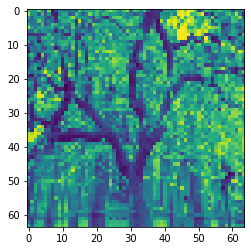

In [76]:
plt.imshow(X_train[300,:,:,0])

In [97]:
Y_train[300]

array([11.])

In [98]:
X_train=X_train/255.0
X_test=X_test/255.0

In [99]:
X_train[0].shape

(64, 64, 1)

In [80]:
!pip install keras-tuner

In [81]:
from tensorflow import keras
from keras_tuner.engine.hyperparameters import HyperParameters
#hyprer/paramter tuning

In [83]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=1),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),#picks like mcq
        activation='relu',
        input_shape=(64,64,1)
    ),
      #for i in range(0,hp.Int(....)) this will also work
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=4),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=4),
        activation='relu'
    ),
    keras.layers.Dense(16, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [84]:
from keras_tuner import RandomSearch

In [85]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3,directory='output',project_name="Flowers")

In [88]:
tuner_search.search(X_train,Y_train,epochs=10,validation_split=0.1)

Trial 3 Complete [00h 33m 29s]
val_accuracy: 0.07350271940231323

Best val_accuracy So Far: 0.2722322940826416
Total elapsed time: 01h 57m 56s
INFO:tensorflow:Oracle triggered exit


In [89]:
model=tuner_search.get_best_models(num_models=1)[0]

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 97)        970       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        55936     
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 108)               24883308  
                                                                 
 dense_1 (Dense)             (None, 16)                1744      
                                                                 
Total params: 24,941,958
Trainable params: 24,941,958
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
310/310 [==============================] - 249s 800ms/step - loss: 1.6434 - accuracy: 0.4890 - val_loss: 2.5590 - val_accuracy: 0.2604
Epoch 2/10
310/310 [==============================] - 233s 751ms/step - loss: 0.6452 - accuracy: 0.8076 - val_loss: 3.5441 - val_accuracy: 0.2387
Epoch 3/10
310/310 [==============================] - 240s 775ms/step - loss: 0.1774 - accuracy: 0.9540 - val_loss: 4.7062 - val_accuracy: 0.2450
Epoch 4/10
310/310 [==============================] - 232s 747ms/step - loss: 0.0491 - accuracy: 0.9915 - val_loss: 5.9233 - val_accuracy: 0.2505
Epoch 5/10
310/310 [==============================] - 234s 754ms/step - loss: 0.0155 - accuracy: 0.9974 - val_loss: 6.9056 - val_accuracy: 0.2414
Epoch 6/10
310/310 [==============================] - 229s 740ms/step - loss: 0.0097 - accuracy: 0.9988 - val_loss: 6.6732 - val_accuracy: 0.2604
Epoch 7/10
310/310 [==============================] - 233s 750ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 6.7339 -

In [92]:
z=model.predict(X_test)

148/148 [==============================] - 15s 103ms/step


In [93]:
z1=np.argmax(z,axis=1) 

In [94]:
z1

array([ 5, 12,  9, ..., 11, 12, 15], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(z1,Y_test)

0.234858110969928